Intercept:  -5.684341886080802e-14
Coeffficient [1.35636678e-14 1.00000000e+00]


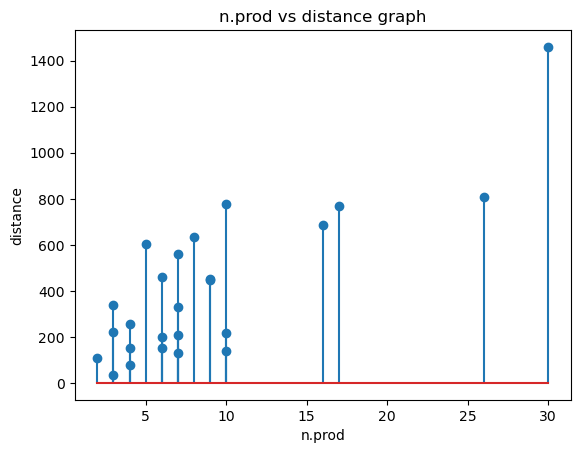

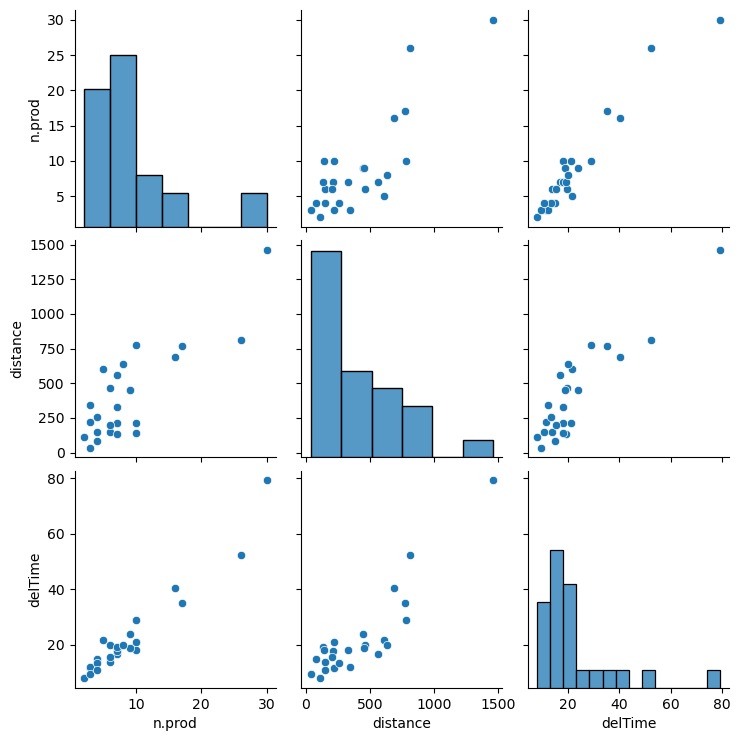

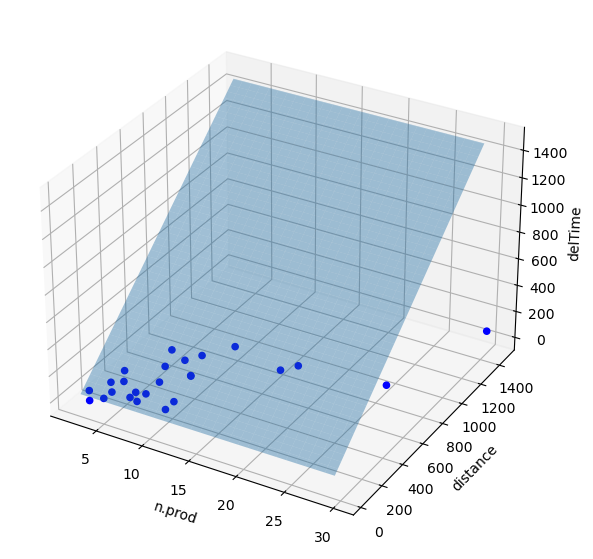

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
dl = pd.read_csv('C:\\Users\Suyash Pandey\OneDrive\Desktop\desktop files\delivery.csv')
dl.head()
X = dl['n.prod']
Y = dl['distance']
Z = dl['delTime']
plt.xlabel('n.prod')
plt.ylabel('distance')
plt.title('n.prod vs distance graph')
plt.stem(X, Y)
sns.pairplot(dl)
S = dl[['n.prod', 'distance']]
model = LinearRegression()
model.fit(S, Y)
print("Intercept: ", model.intercept_)
print("Coeffficient", model.coef_)
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, c = 'blue', alpha = 1, marker = 'o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")
x_surf = np.arange(X.min(), X.max(), 1)
y_surf = np.arange(Y.min(), Y.max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})
out = model.predict(X_mesh)
ax.plot_surface(x_surf, y_surf, out.reshape(x_surf.shape), alpha = 0.4)

In [6]:
dl

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75
5,7,330,18.11
6,2,110,8.00
7,7,210,17.83
8,30,1460,79.24
9,5,605,21.50


In [7]:
np.corrcoef(dl["n.prod"], dl["distance"])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [8]:
vif = pd.Series([variance_inflation_factor(S.values, idx)
                for idx in range(S.shape[1])],
               index = S.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64


In [9]:
model.score(S, Y)

1.0

In [10]:
model1 = LinearRegression()
W = dl[['n.prod','distance']]
R = dl[['delTime']]
model1.fit(W, R)
print(model1.score(W, R))


0.9595937494832257


In [13]:
#G = dl[W]
#H = dl[R]
#adjusted_rscore = 1 - (1 - model2.score(G, H))*(len(H)-1)/(len(H)-G.shape[1]-1)
#print(adjusted_rscore)